# EDA using NBA draft data

This notebook follows Chap 2 of the [statistics-slam-dunk book](https://www.manning.com/books/statistics-slam-dunkhttps://www.manning.com/books/statistics-slam-dunk)

In [1]:
import pandas as pd
import numpy as np
import sqldf
import seaborn as sns
import matplotlib.pyplot as plt
import patchworklib as pw

<Figure size 100x100 with 0 Axes>

In [2]:
%matplotlib inline
sns.set_theme(style='darkgrid')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv("../statisticsplaybook-main/draft.csv", encoding= 'unicode_escape')

In [5]:
df.head()

,Rk,Year,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,College,From,To,G,MP,PTS,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
0,1,2009,NBA,1,1,LAC,Blake Griffin,20.106,F,us,Oklahoma,2011.0,2020.0,622.0,34.8,21.7,8.8,4.4,0.9,0.5,0.498,0.521,0.333,0.694,75.2,0.167
1,2,2009,NBA,1,2,MEM,Hasheem Thabeet,22.135,C,tz,UConn,2010.0,2014.0,224.0,10.5,2.2,2.7,0.1,0.3,0.8,0.567,0.567,NaN,0.578,4.8,0.099
2,3,2009,NBA,1,3,OKC,James Harden,19.308,G,us,Arizona State,2010.0,2020.0,826.0,34.3,25.1,5.3,6.3,1.6,0.5,0.442,0.509,0.363,0.858,133.3,0.226
3,4,2009,NBA,1,4,SAC,Tyreke Evans,19.284,G-F,us,Memphis,2010.0,2019.0,594.0,30.7,15.7,4.6,4.8,1.2,0.4,0.440,0.468,0.323,0.757,28.4,0.075
4,5,2009,NBA,1,5,MIN,Ricky Rubio,18.252,G,es,NaN,2012.0,2020.0,555.0,30.9,11.3,4.2,7.8,1.9,0.1,0.391,0.416,0.326,0.840,36.4,0.102


In [6]:
df.dtypes

Rk           int64
Year         int64
Lg          object
Rd           int64
Pk           int64
Tm          object
Player      object
Age        float64
Pos         object
Born        object
College     object
From       float64
To         float64
G          float64
MP         float64
PTS        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
FG%        float64
2P%        float64
3P%        float64
FT%        float64
WS         float64
WS/48      float64
dtype: object

In [7]:
df['born2'] =  df.Born.apply(lambda x: "USA" if x == "us" else "WORLD")

In [8]:
df['college2'] = df.College.apply(lambda x: 1 if x is not np.nan else 0) 

In [9]:
def normalize_pos(x):
    if x == "G":
        return "Guard"
    elif x == "F":
        return "Forward"
    elif x == "C":
        return "Center"
    elif x == "F-G":
        return "Swingman"
    elif x == "G-F":
        return "Swingman"
    elif x == "F-C":
        return "Big"
    elif x == "C-F":
        return "Big"
    else:
        return "NA"

In [10]:
df['pos2'] = np.vectorize(normalize_pos)(df["Pos"])

**Rk**: A record counter only, with a maximum of 293. The draft data set, when imported into RStudio, had 293 records, where Rk starts at 1 and then increments by one with each subsequent record. Two records were subsequently removed due to incomplete data, thereby reducing the length of draft to 291 records, but the values in Rk remained as is despite the deletions.

**Year**: Represents the year a player was selected in the NBA draft, with a minimum of 2000 and a maximum of 2009. For what it’s worth, the data.world data set actually covers the 1989 to 2016 NBA drafts; however, ten years of data are sufficient for our purposes here, and since our intent (see chapter 3) is to eventually track career trajectories 2009 is a reasonable and even necessary stopping point.

**Pk**: The draft data set contains first-round selections only. This is, therefore, the selection, or pick, number in the first round where, for instance, the number 7 indicates the seventh overall pick.

**Tm**: The abbreviated team name–for instance, NYK for New York Knicks or GSW for Golden State Warriors–that made the draft pick.

**Player**: The name of the player selected, in firstname lastname format (e.g., Stephen Curry).

**Age**: The age of each player at the time he was selected; for instance, Stephen Curry was 21.108 years old when the Warriors selected him seventh overall in 2009.

**Pos**: The position, or positions, for each player, in abbreviated format.

**Born**: The country where each player was born, in abbreviated format.

**College**: The college or university that each player last attended before turning professional. Of course, many players, especially those born overseas, did not attend college; where that is the case the record equals NA.

**From**: The first professional season for each player where, for instance, 2010 equals the 2009-10 season. A typical NBA regular season starts in mid-October and concludes in mid-April the following calendar year. Since the draft data set starts with the 2000 draft the minimum value equals 2001.

**To**: The last season for which the draft data set includes player statistics. The maximum value here is 2020.

**G**: The total number of regular season games played by each player between the 2000-01 and 2019-20 seasons.

**MP**: The average minutes played per regular season game by each player.

**WS**: The number of win shares accrued by each player between the 2000-01 and 2019-20 seasons. Win shares is an advanced statistic used to quantify a player’s contributions to his team’s success. It combines each player’s raw statistics with team and league-wide statistics to produce a number that represents each player’s contributions to his team’s win count. The sum of individual win shares on any team will be approximately equal to that team’s regular season win total. Stephen Curry accrued 103.2 win shares between 2009 and 2020, which is to say that approximately 103 of Golden State’s regular season wins over that ten-year stretch tie back to Curry’s offensive and defensive production. Most of the forthcoming exploratory data analysis focuses on win shares, including its associations with other variables.

**WS.48**: The number of win shares accrued by each each player for every 48 minutes played.

**Born2**: Not in the original data set. This is a derived variable that equals USA if a player was born in the United States or World if the player was born outside the US.

**College2**: Not in the original data set. This is a derived variable that equals 0 if a player did not attend a college or university or, alternatively, a 1 if he did.

**Pos2**: Not in the original data set. This is a derived variable that equals the full position name for each player so that, for instance, F-G and G-F both equal Swingman.

An NBA team might have as many as 15 players on its active roster, but only five players can play at a time. Teams usually play two guards, two forwards, and a center; what’s more, there are point guards and shooting guards and small forwards and power forwards.

- The point guard is basketball’s equivalent to a quarterback; he runs the offense and is usually the best passer and dribbler.
- The shooting guard is oftentimes a team’s best shooter and scorer.
- The small forward is usually a very versatile player; he can score from inside or outside and defend short or tall players.
- The power forward is normally a good defender and rebounder, but not necessarily much of a shooter or scorer.
- The center is a team’s tallest player; he’s usually counted on to defend the basket, block shots, and rebound.

## Summary Stats on the DataFrame

- There is a tremendous amount of variance in career win shares. At least one first-round pick between the 2000 and 2009 NBA drafts actually accrued a negative number of win shares. And one player accrued more than 236 win shares.

- In fact, there is also significant variances in the other career statistics, namely regular season games played and average minutes played per regular season game.

- Going back to win shares, the mean, which is especially sensitive to outliers (or data points far removed from the population center), is significantly greater than the median, suggesting that the mean is skewed by a small number of superstars in the data set.

- First-round NBA draft picks between 2000 and 2009 were anywhere between 17.25 years in age and 25.02 years at the time they were selected.

- More than three-quarters of the players in draft, 224 of 291 to be exact, were born in the United States.

- Nearly the same number of players, 218 to be specific, attended college or university.

In [11]:
df.describe()

,Rk,Year,Rd,Pk,Age,From,To,G,MP,PTS,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48,college2
count,293.000000,293.000000,293.0,293.000000,293.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,280.000000,291.000000,291.000000,291.000000,293.000000
mean,147.000000,2004.563140,1.0,15.160410,20.707993,2005.666667,2013.900344,526.426117,21.526460,8.869416,3.778694,1.849141,0.643986,0.473196,0.444814,0.468113,0.276786,0.728955,29.348110,0.075921,0.744027
std,84.726029,2.875309,0.0,8.485576,1.412733,2.958720,4.931290,319.603457,7.826054,4.983531,2.081452,1.726515,0.367925,0.427708,0.062030,0.058509,0.129652,0.098448,33.643744,0.061589,0.437153
min,1.000000,2000.000000,1.0,1.000000,17.249000,2001.000000,2002.000000,6.000000,4.300000,0.700000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390000,-1.600000,-0.326000,0.000000
25%,74.000000,2002.000000,1.0,8.000000,19.327000,2003.000000,2010.000000,248.000000,15.600000,5.350000,2.200000,0.700000,0.400000,0.200000,0.412500,0.445000,0.235000,0.672000,4.050000,0.050000,0.000000
50%,147.000000,2005.000000,1.0,15.000000,21.011000,2006.000000,2015.000000,549.000000,21.600000,8.000000,3.300000,1.300000,0.600000,0.300000,0.440000,0.470000,0.327500,0.744000,19.600000,0.079000,1.000000
75%,220.000000,2007.000000,1.0,22.000000,22.048000,2008.000000,2018.000000,789.500000,27.700000,11.250000,4.850000,2.300000,0.800000,0.600000,0.480000,0.499500,0.358000,0.800000,43.850000,0.106000,1.000000
max,293.000000,2009.000000,1.0,30.000000,25.019000,2013.000000,2020.000000,1326.000000,38.400000,27.100000,12.300000,9.500000,2.200000,2.100000,0.607000,0.610000,1.000000,1.000000,236.100000,0.244000,1.000000


In [12]:
df.college2.value_counts()

college2
1    218
0     75
Name: count, dtype: int64

In [13]:
df.born2.value_counts()

born2
USA      224
WORLD     69
Name: count, dtype: int64

The standard deviation is a measure of how dispersed the data are relative to the mean. 
- Low standard deviations imply the data are clustered close to the mean; 
- alternatively, high standard deviations suggest the data are more dispersed

In [14]:
df.G.std()

319.60345668101786

In [15]:
df.MP.std()

7.826054243027721

In [16]:
df.WS.std()

33.643744433681874

Using sqldf to query dataframe

In [17]:
sqldf.run("select min(WS), Player, Tm, Pk, Year FROM df")

,min(WS),Player,Tm,Pk,Year
0,-1.6,Mardy Collins,NYK,29,2006


In [18]:
sqldf.run("select max(WS), Player, Tm, Pk, Year FROM df")


,max(WS),Player,Tm,Pk,Year
0,236.1,LeBron James,CLE,1,2003


In [19]:
sqldf.run("select min(G), Player, Tm, Pk, Year FROM df")


,min(G),Player,Tm,Pk,Year
0,6.0,Pavel Podkolzin,UTA,21,2004


In [20]:
sqldf.run("select max(G), Player, Tm, Pk, Year FROM df")


,max(G),Player,Tm,Pk,Year
0,1326.0,Jamal Crawford,CLE,8,2000


In [21]:
sqldf.run("select min(MP), Player, Tm, Pk, Year FROM df")


,min(MP),Player,Tm,Pk,Year
0,4.3,Julius Hodge,DEN,20,2005


In [22]:
sqldf.run("select max(MP), Player, Tm, Pk, Year FROM df")


,max(MP),Player,Tm,Pk,Year
0,38.4,LeBron James,CLE,1,2003


In [23]:
sqldf.run("select min(Age), Player, Tm, Pk, Year FROM df")


,min(Age),Player,Tm,Pk,Year
0,17.249,Andrew Bynum,LAL,10,2005


In [24]:
sqldf.run("select max(Age), Player, Tm, Pk, Year FROM df")


,max(Age),Player,Tm,Pk,Year
0,25.019,Mamadou N'Diaye,DEN,26,2000


### Displaying data via histograms
- many NBA first-round picks between the 2000 and 2009 drafts accrued very few career win shares while just a few players accrued lots of win shares

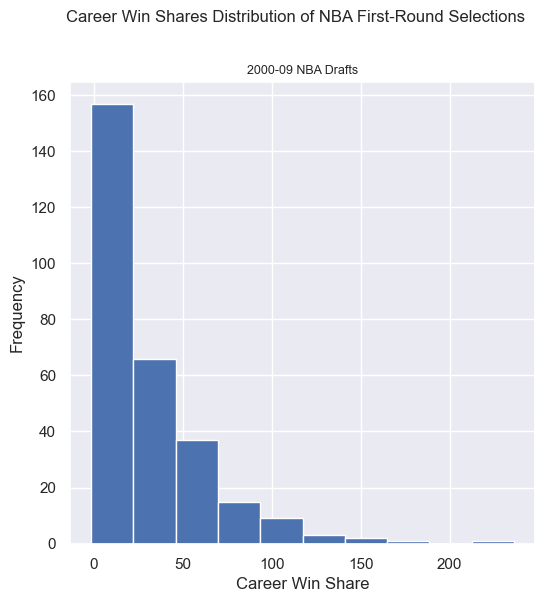

In [25]:
ax = (df.WS).plot.hist(figsize=(6, 6))
ax.set_xlabel('Career Win Share')
plt.title('2000-09 NBA Drafts',fontsize=9)
_ = plt.suptitle('Career Win Shares Distribution of NBA First-Round Selections',fontsize=12, y=1)

#### Breakdown by year

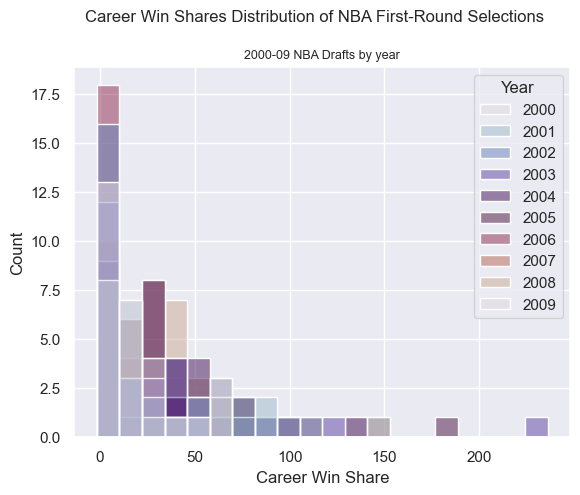

In [26]:
ax = sns.histplot(df, x="WS", hue="Year", palette="twilight")
ax.set_xlabel('Career Win Share')
plt.title('2000-09 NBA Drafts by year',fontsize=9)
_ = plt.suptitle('Career Win Shares Distribution of NBA First-Round Selections',fontsize=12, y=1)

#### Breakdown by place of birth

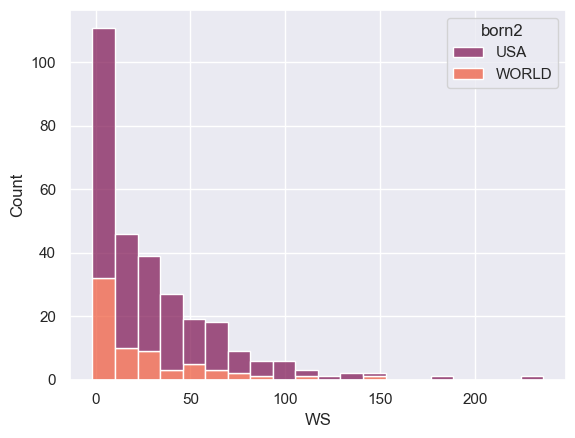

In [27]:
_ = sns.histplot(data=df, x="WS", hue="born2", multiple="stack", palette="rocket")

##### Run some queries to show career win shares is either greater than or equal to 75 or, alternatively, less than 75.



In [28]:
sqldf.run("select COUNT (*) FROM df WHERE WS >= 75")

,COUNT (*)
0,27


In [29]:
sqldf.run("select COUNT (*) FROM df WHERE WS < 75")

,COUNT (*)
0,264


# Viz boxplot 
- Median: The middle value, represented by a horizontal line.
- First Quartile: The middle value between the smallest number (not necessarily the “minimum”) and the median, otherwise known as the 25th percentile.
- Third Quartile: The middle value between the median and the highest number (not necessarily the “maximum”), otherwise known as the 75th percentile.
- Interquartile Range (IQR): The 25th to 75th percentiles; basically, the box.
- “Minimum”: Equal to Q1 - (1.5 * IQR). This is not necessarily the lowest value; there may, in fact, be one or more data points–outliers–beyond the so-called minimum.
- “Maximum”: Equal to Q3 + (1.5 * IQR). Likewise, this may not actually represent the highest value.
- The dots above the whisker are called outliers. 
- Outliers are calculated in three steps:
  - Find Inter Quartile Range (IQR) by subtracting the 25th percentile from the 75th: 75% — 25%
  - The lower outlier limit is calculated by subtracting 1.5 times of IQR from the 25th: 25% — 1.5*IQR
  - The upper outlier limit is calculated by adding 1.5 times of IQR to the 75th: 75% + 1.5*IQR
  - Any values above and below the outlier limits become dots in a box plot.

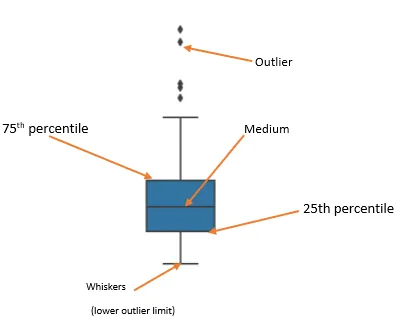

### College Win Share findings 
- Players born in the United States generally accrued more career win shares than did players born outside the US.
- Players born in the US who bypassed college generally accrued more career win shares than did US-born players who did attend a college or university.
- Alternatively, players born in any country other than the United States and who did not attend college or university generally accrued fewer win shares over their respective careers than did other players born outside the US who did attend college.
- The means are consistently higher than the medians, suggesting of course that average win shares, regardless of how the data are sliced and diced, are affected by superstar production

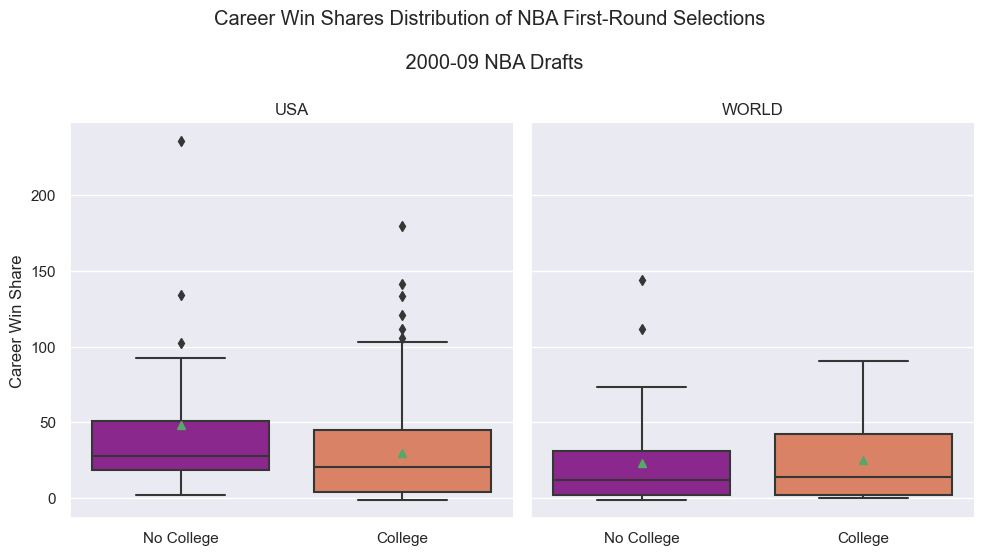

In [30]:
g = sns.catplot(x='college2', 
                 y='WS', 
                 col='born2',
                 kind='box',
                 palette='plasma',
                 showmeans=True,
                 data=df)
g.set_axis_labels("", "Career Win Share")
g.set_xticklabels(["No College", "College"], rotation=0)
g.set_titles("{col_name}")
_ = g.fig.suptitle('Career Win Shares Distribution of NBA First-Round Selections \n' + 
'\n 2000-09 NBA Drafts', y=1.15)


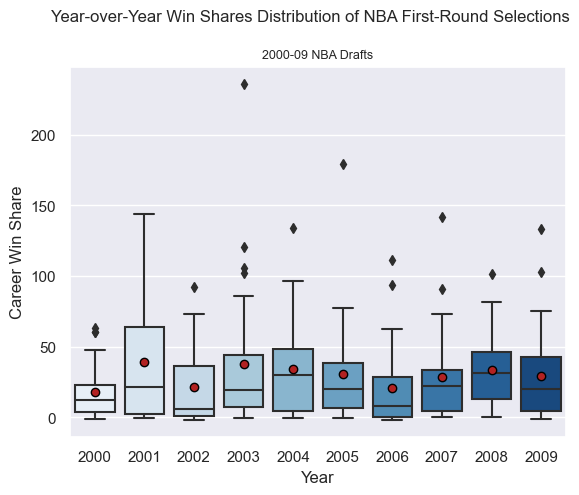

In [31]:
meanpointprops = dict(marker='o', markeredgecolor='black',
                      markerfacecolor='firebrick')
g = sns.boxplot(data=df,
                 x='Year', 
                 y='WS',      
                 palette='Blues',
                 showmeans=True,
                 meanprops=meanpointprops,
                 
                 )
g.set_ylabel('Career Win Share')
plt.title('2000-09 NBA Drafts',fontsize=9)
_ = plt.suptitle('Year-over-Year Win Shares Distribution of NBA First-Round Selections',fontsize=12, y=1)

##### Summary stats on Win Shares

In [32]:
df.describe()['WS']

count    291.000000
mean      29.348110
std       33.643744
min       -1.600000
25%        4.050000
50%       19.600000
75%       43.850000
max      236.100000
Name: WS, dtype: float64

##### computing the mean of win shares by year

In [33]:
df.groupby('Year').describe()['WS']['mean'].to_frame().reset_index()

,Year,mean
0,2000,18.268966
1,2001,39.035714
2,2002,21.414286
3,2003,37.913793
4,2004,33.972414
5,2005,30.572414
6,2006,20.580000
7,2007,28.558621
8,2008,33.723333
9,2009,29.643333


##### counts the number of players in the draft data set who accrued 75 or more win shares in their respective careers by year

In [34]:
df.loc[df['WS'] >= 75].groupby('Year').size()

Year
2001    7
2002    1
2003    5
2004    2
2005    3
2006    2
2007    2
2008    2
2009    3
dtype: int64

#### Use sqlDF to query spcific players 

##### Player and Pk from draft where WS is greater than or equal to 75 and the variable Year equals 2001

In [35]:
sqldf.run("select Player, Pk FROM df WHERE WS >= 75 AND Year == 2001")


,Player,Pk
0,Tyson Chandler,2
1,Pau Gasol,3
2,Shane Battier,6
3,Joe Johnson,10
4,Richard Jefferson,13
5,Zach Randolph,19
6,Tony Parker,28


##### WS again is greater than or equal to 75 and the variable Year this time equals 2003

In [36]:
sqldf.run("select Player, Pk, WS FROM df WHERE WS >= 75 AND Year == 2003 ORDER BY WS DESC")

,Player,Pk,WS
0,LeBron James,1,236.1
1,Dwyane Wade,5,120.7
2,Chris Bosh,4,106.0
3,Carmelo Anthony,3,102.0
4,David West,18,85.9


#####  WS is greater than or equal to 75; between the group_by() and agg() functions, the mean of Pk is computed across each year in draft

In [37]:
df.loc[df['WS'] >= 75][['Year','Pk']].groupby('Year').agg('mean')

,Pk
Year,
2001,11.571429
2002,9.000000
2003,6.200000
2004,5.000000
2005,12.333333
2006,13.000000
2007,2.500000
2008,4.500000
2009,3.666667


##### query the avg Pk for WS greater than or equal to 75

In [38]:
sqldf.run("select AVG(Pk) FROM df WHERE WS >= 75")

,AVG(Pk)
0,8.111111


##### Now do the median

In [39]:
df.loc[df['WS'] >= 75][['Year','Pk']].groupby('Year').agg('median')

,Pk
Year,
2001,10.0
2002,9.0
2003,4.0
2004,5.0
2005,4.0
2006,13.0
2007,2.5
2008,4.5
2009,3.0


In [40]:
sqldf.run("select COUNT (*) FROM df WHERE WS < 5")

,COUNT (*)
0,81


In [41]:
sqldf.run("select COUNT (*) FROM df WHERE WS < 0")

,COUNT (*)
0,20


## Boxplot summary 
- The 2001 class stands out: first-round selections from the 2001 NBA draft averaged more win shares over the course of their careers, 39, than any other class of first-round selections between 2000 and 2009. Only in 2001 does the top-end of the Interquartile Range exceed 50 win shares.
- Furthermore, seven players from this same class accrued 75 or more win shares during their careers, the most of any class within the draft data set. Three of these players–Tyson Chandler, Pau Gasol and Shane Battier–were amongst the top six picks that year; three other players–Joe Johnson, Richard Jefferson and Zach Randoph–were selected between picks 10 and 19; and then there’s Tony Parker, who was selected at 28 and then accrued 111.3 win shares, all while playing for the San Antonio Spurs.
- First-round selections from the 2003 NBA draft averaged almost as many win shares, 38, as did the first-round picks from the 2001 class. LeBron James, Dwayne Wade, Chris Bosh, Carmelo Anthony and David West accrued more than 75 win shares in their respective careers, and that’s just through the 2019-20 season.
- Four of the five players referenced above–all but David West–were amongst the first five players selected in 2001.
- On the flip side, the 2000 class was probably the most disappointing; first-round selections from 2000 averaged barely 18 win shares in their respective careers, easily the lowest average of any class in the draft data set. Not surprisingly, no players drafted in 2000 earned up to 75 win shares in their respective careers. Only in 2000 does the top-end of the Interquartile Range fall short of 25 win shares.
- Players that, so far, have accrued at least 75 win shares were selected eighth, on average; in fact, in the nine classes from draft that include at least one player who has since accrued 75 or more win shares, in five of these classes the average was 6 or less. The median equals 4.
- When draft is subset on those players who have accrued a minimum of 100 win shares in their respective careers, the average pick, or selection, number equals 4 and the median is 3.
- Of the 291 first-round selections in the draft data set, 81 of them accrued fewer than 5 career win shares, and 20 of these players accrued a negative number of career win shares.

# Correlation

- Correlation coefficients between two continuous variables will always equal some number between -1 and 1. 
- If and when the correlation coefficient equals, or is at least close to, -1, then the relationship between the two variables is negatively correlated; 
  - which is to say that when one variable increases the other decreases.   
- If instead the correlation coefficient is equal to 1, or is at least approaching that, then the relationship between the two variables is positively correlated 
  - meaning the two variables always move in the same direction

##### Get the correlation of the five continous variables in the draft dataframe

In [42]:
corr_df = df[['Age', 'G', 'MP', 'WS', 'WS/48']].corr()
corr_df

,Age,G,MP,WS,WS/48
Age,1.000000,-0.218960,-0.232785,-0.250965,-0.180153
G,-0.218960,1.000000,0.792162,0.800480,0.616543
MP,-0.232785,0.792162,1.000000,0.775888,0.659787
WS,-0.250965,0.800480,0.775888,1.000000,0.694206
WS/48,-0.180153,0.616543,0.659787,0.694206,1.000000


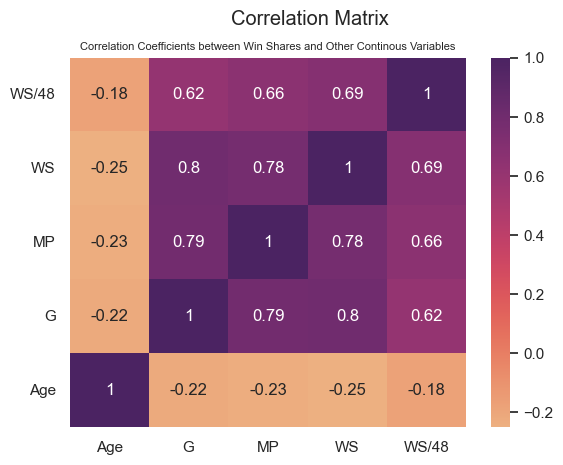

In [43]:
ax = sns.heatmap(corr_df,  annot=True, cmap='flare')
plt.suptitle('Correlation Matrix')
plt.title('Correlation Coefficients between Win Shares and Other Continous Variables', fontsize=8)
ax.invert_yaxis()
_ = plt.yticks(rotation=0) 

- There are positive, and strong, correlations between win shares and regular season games played, minutes played per regular season game, and win shares for every 48 minutes of playing time. 
- Mind you, correlation coefficients don’t tell us which variable might be influencing another variable, if in fact there is any causation at all.
- However, there is a negative correlation between the variables Win Shares and Age; which is to say that players entering the NBA draft between 2000 and 2009 at younger ages then accrued, generally, more career win shares than players who turned professional at “older” ages. The correlation between these variables is not strong, however. No doubt this is partially true because younger players likely have more years to play professional ball, and therefore more opportunity to accrue more win shares; but it’s also true–or at least likely so–that better players turn professional at younger ages than lesser players.

# Viz Population Means and Medians

In [44]:
ws_df = df[['born2', 'WS']].groupby('born2').agg(
    meanWS=pd.NamedAgg("WS", "mean"),
    medianWS=pd.NamedAgg("WS", "median")).reset_index()
ws_df

,born2,meanWS,medianWS
0,USA,31.099107,21.5
1,WORLD,23.494030,12.8


##### There are two significant conclusions to draw from these two bar charts:

- Players born in the US, on average, accrue more career win shares than players born elsewhere.
- The means are significantly greater than the medians. Means are sensitive to outliers whereas medians are not; that the means are greater than the medians suggests, of course, that they are influenced by superstar production where win shares per superstar is greater than 100.

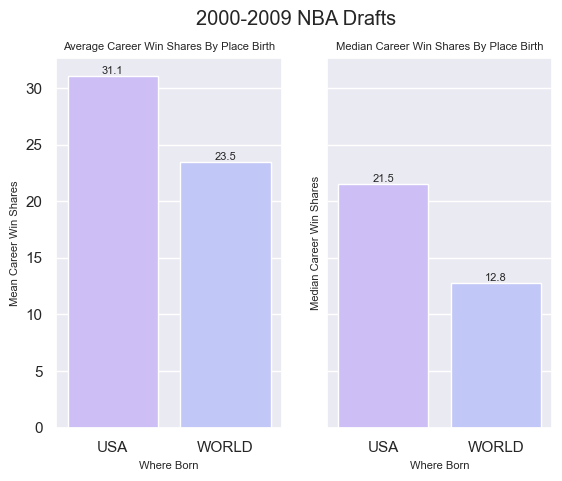

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

palettes = ['#c8b6ff', '#b8c0ff']
sns.barplot(data=ws_df, x='born2', y='meanWS', palette=palettes, ax=ax1)
ax1.set_title("Average Career Win Shares By Place Birth", size=8)
plt.suptitle("2000-2009 NBA Drafts")
ax1.set_ylabel("Mean Career Win Shares", size=8)
ax1.set_xlabel("Where Born", size=8)
ax1.bar_label(ax1.containers[0], size=8, fmt='%.1f')

sns.barplot(data=ws_df, x='born2', y='medianWS', palette=palettes, ax=ax2)
ax2.set_title("Median Career Win Shares By Place Birth", size=8)
ax2.set_ylabel("Median Career Win Shares", size=8)
ax2.set_xlabel("Where Born", size=8)
ax2.bar_label(ax2.containers[0], size=8, fmt='%.1f')

_ = plt.show()

In [46]:
c_df = df[['college2', 'WS']].groupby('college2').agg(
    meanWS=pd.NamedAgg("WS", "mean"),
    medianWS=pd.NamedAgg("WS", "median")).reset_index()
c_df

,college2,meanWS,medianWS
0,0,30.315068,19.60
1,1,29.024312,19.65


Between the two levels, or factors, in the variable College2, the means are essentially equal and the medians are essentially equal; 

however, the means are again significantly greater than the medians due to superstar outliers. 



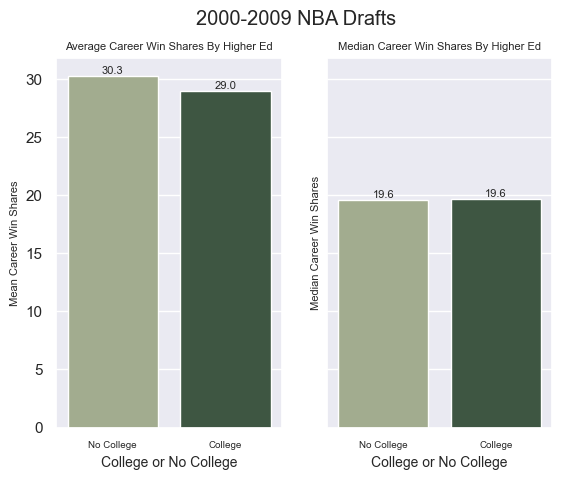

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

palettes = ['#a3b18a', '#3a5a40']
sns.barplot(data=c_df, x='college2', y='meanWS', palette=palettes, ax=ax1)
ax1.set_title("Average Career Win Shares By Higher Ed", size=8)
plt.suptitle("2000-2009 NBA Drafts")
ax1.set_ylabel("Mean Career Win Shares", size=8)
ax1.set_xlabel("College or No College", size=10)
ax1.bar_label(ax1.containers[0], size=8, fmt='%.1f')
ax1.set_xticklabels(["No College", "College"], rotation=0,size=7)

sns.barplot(data=c_df, x='college2', y='medianWS', palette=palettes, ax=ax2)
ax2.set_title("Median Career Win Shares By Higher Ed", size=8)
ax2.set_ylabel("Median Career Win Shares", size=8)
ax2.set_xlabel("College or No College", size=10)
ax2.bar_label(ax2.containers[0], size=8, fmt='%.1f')
ax2.set_xticklabels(["No College", "College"], rotation=0, size=7)

_ = plt.show()

In [48]:
f_df = df[['college2', 'born2', 'pos2', 'WS']].groupby(['born2', 'college2', 'pos2']).agg(
    mean=pd.NamedAgg("WS", "mean"),
    median=pd.NamedAgg("WS", "median")).reset_index()
f_df.drop([14], axis=0, inplace=True) 
f_df.reset_index(inplace=True)
f_df.drop(columns=['index'], inplace=True)

f_df

,born2,college2,pos2,mean,median
0,USA,0,Big,81.750000,81.75
1,USA,0,Center,54.116667,32.65
2,USA,0,Forward,24.450000,18.65
3,USA,0,Guard,19.225000,21.00
4,USA,0,Swingman,70.300000,25.90
5,USA,1,Big,36.445000,24.80
6,USA,1,Center,22.405263,20.10
7,USA,1,Forward,25.223077,13.10
8,USA,1,Guard,29.816667,18.40
9,USA,1,Swingman,39.619048,30.40


In [49]:
pw.overwrite_axisgrid() #When you use pw.load_seagorngrid, 'overwrite_axisgrid' should be executed.

In [50]:
with sns.plotting_context('paper', font_scale = 1.3):
    g1 = sns.FacetGrid(f_df, 
                      col="college2",  
                      row="born2",
                      margin_titles=True,  
                      aspect=1.50,
                      gridspec_kws={"wspace":0.008, "hspace":0.035}
                     )
g1.map(sns.barplot, "pos2", "mean")     
# g1.fig.suptitle('Average Win Shares By Place of Birth', size=13)
# pw.title('2000-2009 NBA Draft', size=8, y=2.2, x=-.84)
# g1.set_axis_labels(' ', 'Mean Win Shares')
g1.set_titles(row_template = '{row_name}')
g1.set_axis_labels(' ', '')

# Custom change the column names
for ax, title in zip(g1.axes.flat, ['No College', 'College']):
    ax.set_title(title)

    
g1 = pw.load_seaborngrid(g1, label='g1')
g1.set_supylabel('Win Shares')
g1.set_text(x=.43, y=1.01, text="2000-2009 NBA Draft", fontdict={"size": 9})
_ = g1.set_suptitle("Average Win Shares By Place of Birth",  pad=16, fontdict={"weight": "bold", "y": 1.2})


In [51]:
with sns.plotting_context('paper', font_scale = 1.3):
    g2 = sns.FacetGrid(f_df, 
                      col="college2",  
                      row="born2",
                      margin_titles=True,  
                      aspect=1.50,
                      gridspec_kws={"wspace":0.008, "hspace":0.035}
                     )
g2.map(sns.barplot, "pos2", "median",  color='red')
# g2.figure.subplots_adjust(top=0.8);
g2.set_axis_labels(' ', '')
g2.set_titles(row_template = '{row_name}')

# Custom change the column names
for ax, title in zip(g2.axes.flat, ['No College', 'College']):
    ax.set_title(title)

g2 = pw.load_seaborngrid(g2, label='g2')
g2.set_supylabel('Win Shares')
g2.set_text(x=.43, y=1.01, text="2000-2009 NBA Draft", fontdict={"size": 9})
_ = g2.set_suptitle("Median Win Shares By Place of Birth", pad=16, fontdict={"weight": "bold", "size": 12, "y": 1.2})


Bigs, Centers, and Swingmen born in the US who did not attend a college or university before entering the NBA draft accrued significantly more win shares, on average, than other players at other positions regardless of where they were born and regardless of whether or not they first attended college

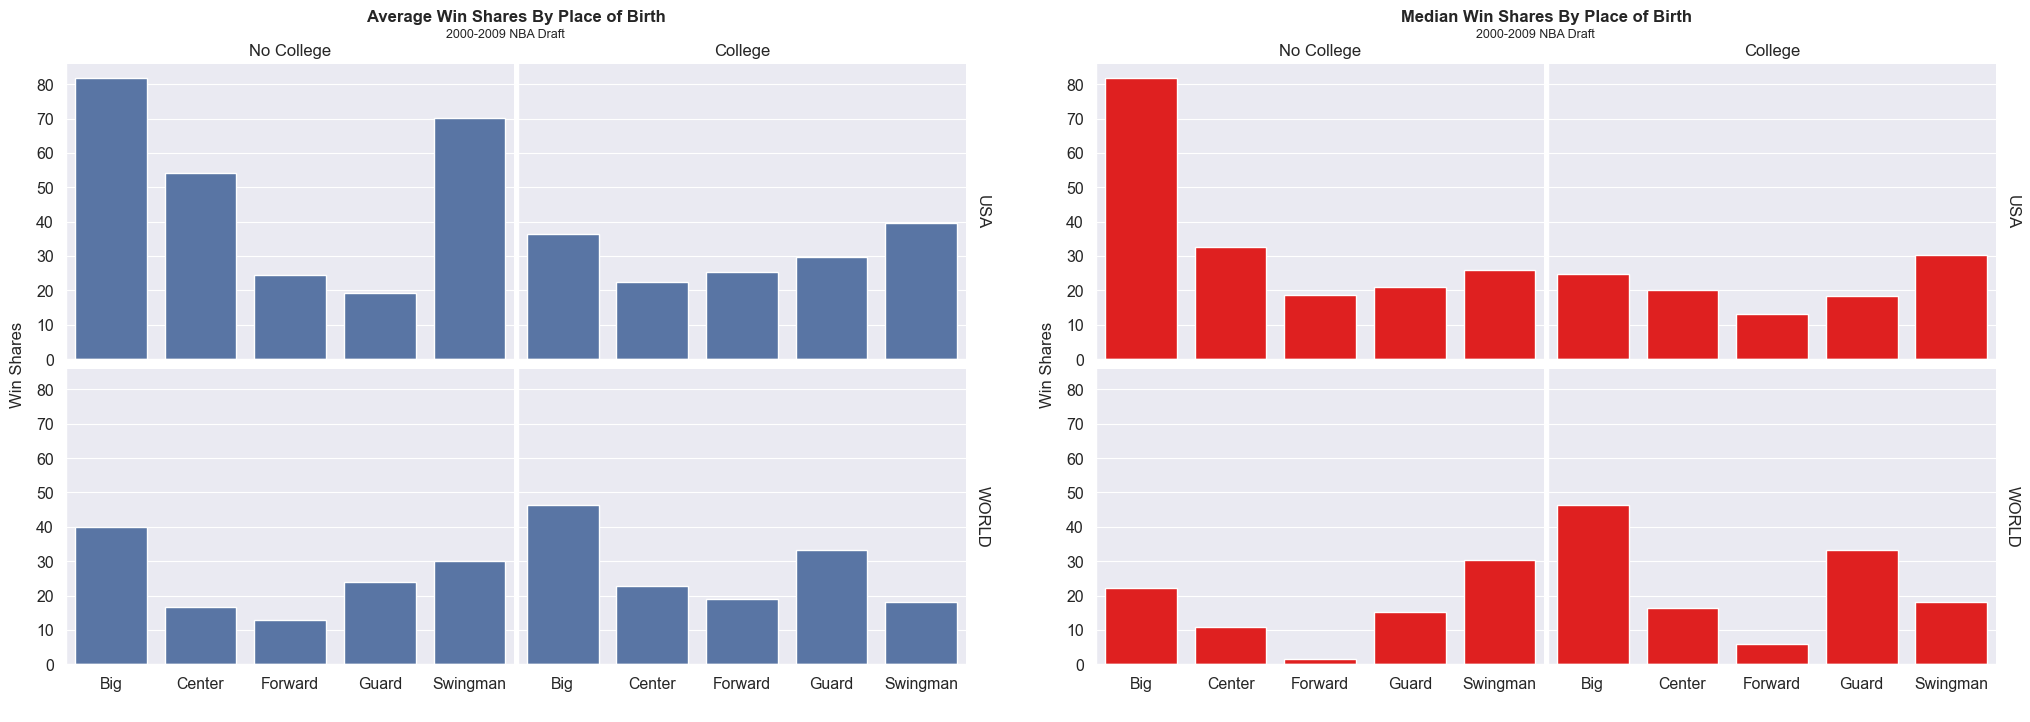

In [52]:
(g1|g2).savefig("seaborn_subplots.png")